In [600]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

Analysis of Life On The Edge Fund (High risk)

In [601]:
optimal_weights = pd.read_csv('Life On The Edge Fund\stock_weights.csv')
optimal_weights.set_index('Ticker',inplace=True)


In [602]:
tickers = ['AAPL', 'ABNB', 'ADBE', 'ELF', 'LRCX', 'NVDA', 'PYPL', 'RBLX', 'SHOP', 'TSLA', 'TTD']
ticker_returns = {}
for ticker in tickers:
    returns = pd.read_csv(f'Life On The Edge Fund\{ticker}.csv')
    returns['Date'] = pd.to_datetime(returns['Date'])
    returns = returns[returns['Date'] > '2021-03-01']
    returns.set_index('Date',inplace=True)
    returns['Monthly Return'] = returns['Close'].pct_change()
    ticker_returns[f'{ticker}'] = returns

ticker_returns



{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2021-04-01  123.660004  137.070007  122.489998  131.460007  129.206772   
 2021-05-01  132.039993  134.070007  122.250000  124.610001  122.474152   
 2021-06-01  125.080002  137.410004  123.129997  136.960007  134.841110   
 2021-07-01  136.600006  150.000000  135.759995  145.860001  143.603424   
 2021-08-01  146.360001  153.490005  144.500000  151.830002  149.481049   
 2021-09-01  152.830002  157.259995  141.270004  141.500000  139.519623   
 2021-10-01  141.899994  153.169998  138.270004  149.800003  147.703445   
 2021-11-01  148.990005  165.699997  147.479996  165.300003  162.986526   
 2021-12-01  167.479996  182.130005  157.800003  177.570007  175.340317   
 2022-01-01  177.830002  182.940002  154.699997  174.779999  172.585342   
 2022-02-01  174.009995  176.649994  152.000000  165.119995  163.046616   
 2022-03-01  164.

In [603]:
quantities_bought ={}
for ticker in tickers:
    quantities_bought[ticker] = (50000*optimal_weights.loc[ticker,'Weights'])/ticker_returns[ticker].loc['2021-04-01','Close']


quantities_bought


{'AAPL': 5.5296744930653325,
 'ABNB': 55.926521325073885,
 'ADBE': 10.166853623551933,
 'ELF': 207.35264071511358,
 'LRCX': 13.287177976290062,
 'NVDA': 0.9190527713021903,
 'PYPL': 40.18175336997785,
 'RBLX': 81.60708525335285,
 'SHOP': 0.4459756736877124,
 'TSLA': 2.0123231422178516,
 'TTD': 36.19443375792153}

In [604]:
portfolio_returns = {'Date':ticker_returns['AAPL'].index,'Value':[0 for i in range(36)]}
portfolio_returns = pd.DataFrame(portfolio_returns)
portfolio_returns.set_index('Date',inplace=True)

In [605]:
portfolio_returns['Value'] = 0
for ticker in tickers:
    portfolio_returns['Value'] += quantities_bought[ticker] * ticker_returns[ticker]['Close']



In [606]:
portfolio_returns


,Value
Date,
2021-04-01,50000.000000
2021-05-01,48964.873763
2021-06-01,52109.665465
2021-07-01,50400.077857
2021-08-01,52668.603488
2021-09-01,49539.980867
2021-10-01,51134.154978
2021-11-01,55251.772244
2021-12-01,52853.494555


<Axes: xlabel='Date'>

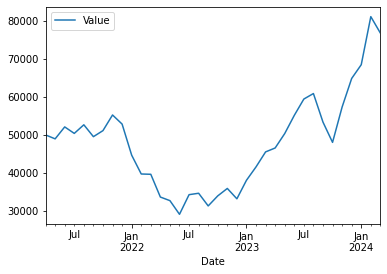

In [607]:
portfolio_returns.plot()

In [608]:
sp500 = pd.read_csv('sp500_index.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500[sp500['Date'] > '2021-03-01']
sp500.set_index('Date',inplace=True)
sp500 = sp500.resample('MS').first()
sp500

,Price
Date,
2021-03-01,3870.29
2021-04-01,4019.87
2021-05-01,4192.66
2021-06-01,4202.04
2021-07-01,4319.94
2021-08-01,4387.16
2021-09-01,4524.09
2021-10-01,4357.04
2021-11-01,4613.67


In [609]:
quantity_sp500 = 50000/sp500.loc['2021-04-01','Price']

sp500['Value'] = sp500['Price'] * quantity_sp500
sp500.drop(columns='Price',inplace=True)
sp500


,Value
Date,
2021-03-01,48139.492073
2021-04-01,50000.000000
2021-05-01,52149.198855
2021-06-01,52265.869294
2021-07-01,53732.334628
2021-08-01,54568.431317
2021-09-01,56271.595848
2021-10-01,54193.792337
2021-11-01,57385.810984


In [632]:
combined_data = pd.merge(sp500, portfolio_returns, left_index=True, right_index=True, suffixes=('_sp500', '_portfolio'))
combined_data
combined_data.to_csv('combined.csv')

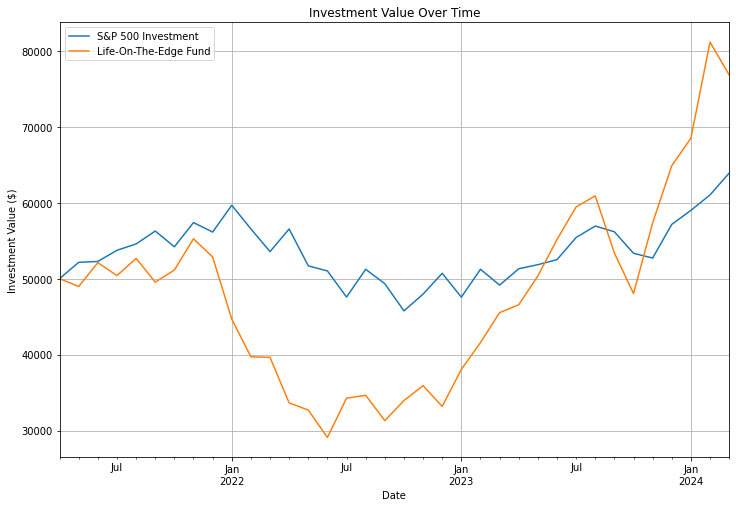

In [611]:
combined_data.plot(figsize=(12, 8))
plt.title('Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(['S&P 500 Investment', 'Life-On-The-Edge Fund'])
plt.grid(True)
plt.show()

Stay-at-Home-Fund (Low risk portfolio)

In [612]:
low_risk_weights = pd.read_csv('Stay At Home Fund\weights.csv')
low_risk_weights.set_index('Ticker', inplace=True)

In [613]:
low_risk_tickers = ['CVX', 'GOLD', 'IBM', 'JNJ', 'KO', 'MDLZ', 'MRK', 'MSFT', 'NGG', 'O', 'PG',
                    'T','V','WMT']
low_risk_ticker_returns = {}
for ticker in low_risk_tickers:
    returns = pd.read_csv(f'Stay At Home Fund\{ticker}.csv')
    returns['Date'] = pd.to_datetime(returns['Date'])
    returns = returns[returns['Date'] > '2023-03-01']
    returns.set_index('Date',inplace=True)
    returns['Monthly Return'] = returns['Close'].pct_change()
    low_risk_ticker_returns[f'{ticker}'] = returns






In [614]:
low_risk_quantities_bought = {}

for ticker in low_risk_tickers:
    
    if ticker == 'Cash':
        continue
        
    low_risk_quantities_bought[ticker] = (50000 * low_risk_weights.loc[ticker,'Weights'])/low_risk_ticker_returns[ticker].loc['2023-04-01','Close']


In [615]:
low_risk_portfolio_returns = {'Date':low_risk_ticker_returns['MRK'].index,'Value':low_risk_ticker_returns['MRK']['Close']}
low_risk_portfolio_returns = pd.DataFrame(low_risk_portfolio_returns)
low_risk_portfolio_returns.set_index('Date',inplace=True)



In [616]:

low_risk_portfolio_returns['Value'] = 0
for ticker in low_risk_tickers:
    low_risk_portfolio_returns['Value'] += low_risk_quantities_bought[ticker] * low_risk_ticker_returns[ticker]['Close']

low_risk_portfolio_returns['Value'] += low_risk_weights.loc['Cash','Weights'] * 50000


<Axes: xlabel='Date'>

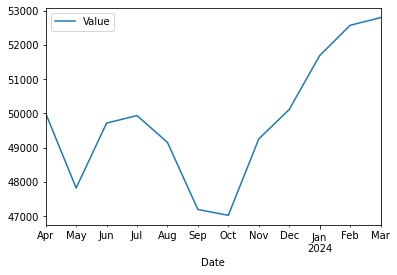

In [617]:
low_risk_portfolio_returns.plot()

In [618]:
sp500 = pd.read_csv('sp500_index.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500[sp500['Date'] > '2023-03-01']
sp500.set_index('Date',inplace=True)
sp500 = sp500.resample('MS').first()
sp500

,Price
Date,
2023-03-01,3981.35
2023-04-01,4124.51
2023-05-01,4167.87
2023-06-01,4221.02
2023-07-01,4455.59
2023-08-01,4576.73
2023-09-01,4515.77
2023-10-01,4288.39
2023-11-01,4237.86


In [619]:
quantity_sp500 = 50000/sp500.loc['2023-04-01','Price']

sp500['Value'] = sp500['Price'] * quantity_sp500
sp500.drop(columns='Price',inplace=True)
sp500


,Value
Date,
2023-03-01,48264.521119
2023-04-01,50000.000000
2023-05-01,50525.638197
2023-06-01,51169.957159
2023-07-01,54013.567672
2023-08-01,55482.105753
2023-09-01,54743.108878
2023-10-01,51986.660234
2023-11-01,51374.102621


In [620]:
combined_data = pd.merge(sp500, low_risk_portfolio_returns, left_index=True, right_index=True, suffixes=('_sp500', '_portfolio'))
combined_data

,Value_sp500,Value_portfolio
Date,,
2023-04-01,50000.000000,50000.000000
2023-05-01,50525.638197,47820.466518
2023-06-01,51169.957159,49716.232537
2023-07-01,54013.567672,49935.236290
2023-08-01,55482.105753,49152.643799
2023-09-01,54743.108878,47193.102449
2023-10-01,51986.660234,47023.011891
2023-11-01,51374.102621,49252.568384
2023-12-01,55699.101227,50112.593721


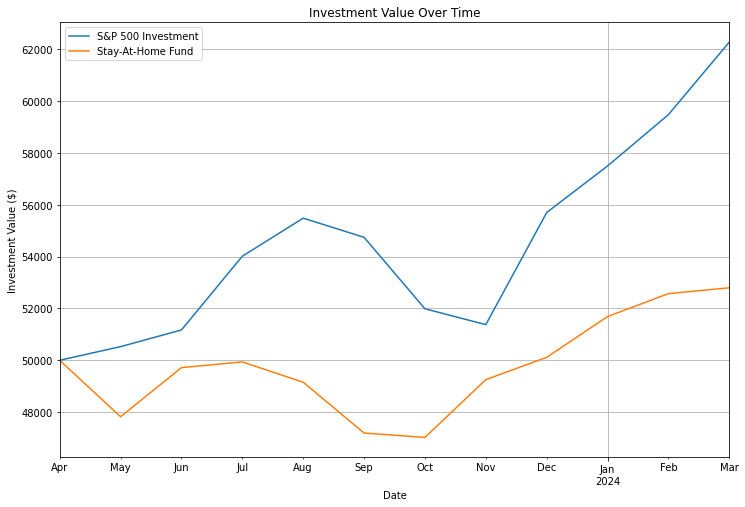

In [621]:
combined_data.plot(figsize=(12, 8))
plt.title('Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(['S&P 500 Investment', 'Stay-At-Home Fund'])
plt.grid(True)
plt.show()

Out-In-The-World Fund (Medium Risk)

In [622]:
med_risk_weights = pd.read_csv('Out In The World Fund\weights.csv')
med_risk_weights.set_index('Ticker', inplace=True)

In [623]:
med_risk_tickers = ['AVGO', 'AVNW', 'DHL.DE', 'DINO', 'EHC', 'FIHL', 'GGG', 'LYG', 'META', 'THO', 'VAC',
                    'VICI','VOW3.DE','VZ','WMT']
med_risk_ticker_returns = {}
for ticker in med_risk_tickers:
    returns = pd.read_csv(f'Out In The World Fund\{ticker}.csv')
    returns['Date'] = pd.to_datetime(returns['Date'])
    returns = returns[returns['Date'] > '2023-06-01']
    returns.set_index('Date',inplace=True)
    returns['Monthly Return'] = returns['Close'].pct_change()
    med_risk_ticker_returns[f'{ticker}'] = returns







In [624]:
med_risk_quantities_bought = {}

for ticker in med_risk_tickers:
  
    
    if ticker == 'Cash':
        continue
        
    med_risk_quantities_bought[ticker] = (50000 * med_risk_weights.loc[ticker,'Weights'])/med_risk_ticker_returns[ticker].loc['2023-07-01','Close']


In [625]:
med_risk_portfolio_returns = {'Date':med_risk_ticker_returns['FIHL'].index,'Value':med_risk_ticker_returns['FIHL']['Close']}
med_risk_portfolio_returns = pd.DataFrame(med_risk_portfolio_returns)
med_risk_portfolio_returns.set_index('Date',inplace=True)



In [626]:

med_risk_portfolio_returns['Value'] = 0
for ticker in med_risk_tickers:
    med_risk_portfolio_returns['Value'] += med_risk_quantities_bought[ticker] * med_risk_ticker_returns[ticker]['Close']

#med_risk_portfolio_returns['Value'] += med_risk_weights.loc['Cash','Weights'] * 50000


<Axes: xlabel='Date'>

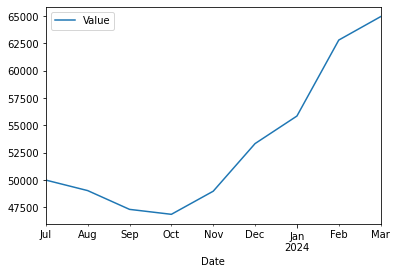

In [627]:
med_risk_portfolio_returns.plot()

In [628]:
sp500 = pd.read_csv('sp500_index.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500[sp500['Date'] > '2023-03-01']
sp500.set_index('Date',inplace=True)
sp500 = sp500.resample('MS').first()


In [629]:
quantity_sp500 = 50000/sp500.loc['2023-07-01','Price']

sp500['Value'] = sp500['Price'] * quantity_sp500
sp500.drop(columns='Price',inplace=True)



In [630]:
combined_data = pd.merge(sp500, med_risk_portfolio_returns, left_index=True, right_index=True, suffixes=('_sp500', '_portfolio'))
combined_data

,Value_sp500,Value_portfolio
Date,,
2023-07-01,50000.000000,50000.000000
2023-08-01,51359.415925,49038.050352
2023-09-01,50675.331438,47320.125221
2023-10-01,48123.705278,46867.853157
2023-11-01,47556.664774,48982.192255
2023-12-01,51560.287190,53340.334740
2024-01-01,53223.366602,55859.930250
2024-02-01,55056.569388,62811.410210
2024-03-01,57647.584271,64953.751424


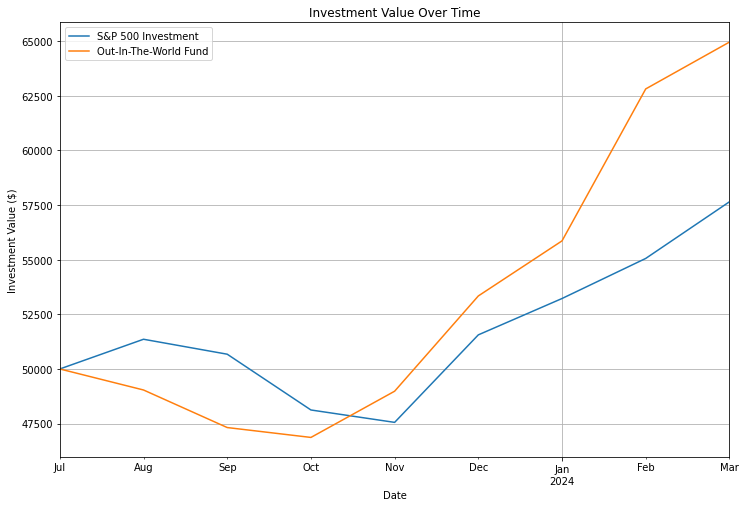

In [631]:
combined_data.plot(figsize=(12, 8))
plt.title('Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(['S&P 500 Investment', 'Out-In-The-World Fund'])
plt.grid(True)
plt.show()